# Bar Chart with Matplotlib

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Setting seaborn as default style even if use only matplotlib
sns.set()

## Example 1: Simple Bar Chart

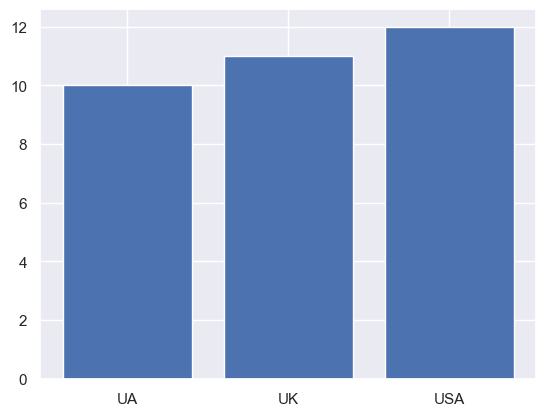

In [2]:
plt.bar(['UA', 'UK', 'USA'], [10, 11, 12])
plt.show()

## Example 2: Using Pandas DataFrames

### Datasets for Visualizations

In [3]:
# url 1
grouped_country_df_url = "https://raw.githubusercontent.com/nyangweso-rodgers/Data_Analytics/main/Analytics-with-Python/Exploratory-Data-Analysis-with-Python/Exploratory-Data-Analysis-for-Online-Retail-Store/grouped_country_data.csv"
grouped_country_df = pd.read_csv(grouped_country_df_url)

# url 2
grouped_daily_country_df_url = "https://raw.githubusercontent.com/nyangweso-rodgers/Data_Analytics/main/Analytics-with-Python/Exploratory-Data-Analysis-with-Python/Exploratory-Data-Analysis-for-Online-Retail-Store/grouped_daily_country_df.csv"
grouped_daily_country_df = pd.read_csv(grouped_daily_country_df_url)

In [4]:
# preview the data
grouped_country_df.head()

,Country,CountOfUniqueCustomers,TotalAmount,CountOfUniqueInvoices,AverageSalesValue
0,Australia,9,138521.31,57,15391.256667
1,Austria,11,10198.68,17,927.152727
2,Bahrain,2,548.40,2,274.200000
3,Belgium,25,41196.34,98,1647.853600
4,Brazil,1,1143.60,1,1143.600000


In [5]:
grouped_daily_country_df.head()

,Date,Country,MonthYear,TotalAmount,CountOfUniqueInvoices,CountOfUniqueCustomers
0,2010-12-01,Australia,2010-12,358.25,1,1
1,2010-12-01,EIRE,2010-12,555.38,2,1
2,2010-12-01,France,2010-12,855.86,1,1
3,2010-12-01,Germany,2010-12,261.48,1,1
4,2010-12-01,Netherlands,2010-12,192.60,1,1


#### Data Aggregations for Visualizations

In [6]:
# get month on month total sales value
monthly_agg_df = grouped_daily_country_df.groupby('MonthYear').agg(
    TotalAmount = pd.NamedAgg(column='TotalAmount', aggfunc='sum')
).reset_index()

# get month on month total sales value by Country
country_monthly_agg_df = grouped_daily_country_df.groupby(['MonthYear', 'Country']).agg(
    TotalAmount = pd.NamedAgg(column='TotalAmount', aggfunc='sum')
)

#### Filter the DataFame for Visualization

In [7]:
# Filter Only Countries with More than 5 Customers
filtered_df = grouped_country_df[grouped_country_df['CountOfUniqueCustomers'] >= 10]
filtered_df.shape

(11, 5)

In [8]:
df = filtered_df[['Country', 'TotalAmount', 'CountOfUniqueCustomers', 'AverageSalesValue', 'CountOfUniqueInvoices']]#.set_index('Country')

#### Total Sales Value By Month-Year

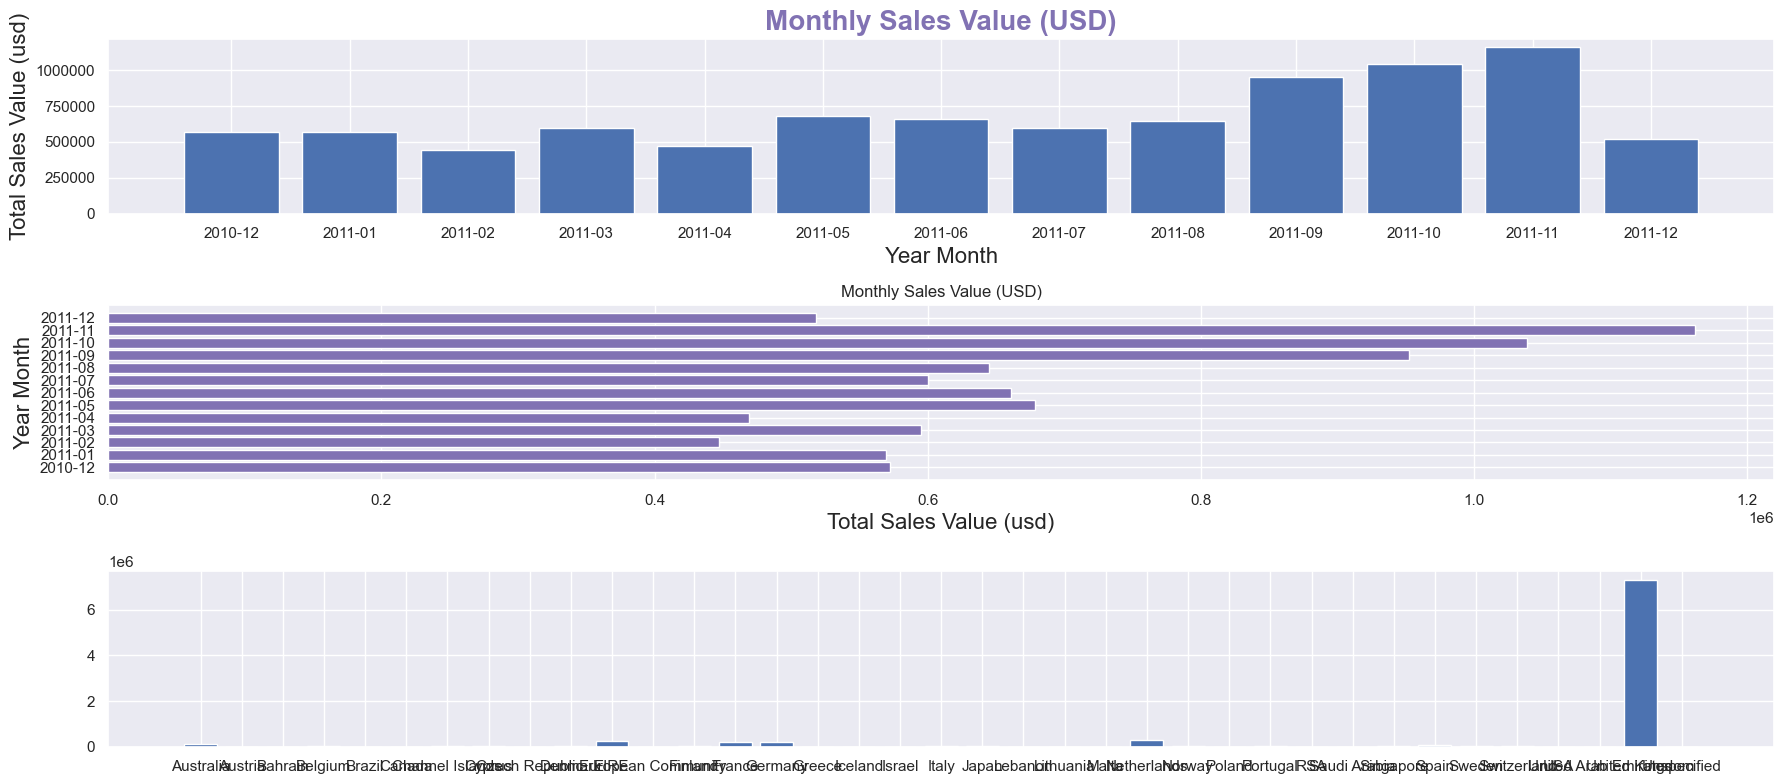

In [22]:
# --- Setup the figure and the axes:
#plt.ticklabel_format(style='plain')
fig, ax = plt.subplots(3,1, sharey=False, figsize=(18,8))



ax[0].bar(monthly_agg_df.MonthYear, monthly_agg_df.TotalAmount)
#ax[0].set_xticklabels(monthly_agg_df.MonthYear)
ax[0].ticklabel_format(axis='y', style='plain')
# -- Set the label for each bar to appear inside each bar with the value
#ax.set_xticks(x)
#ax[0].bar_label(container=ax[0], label_type="center")
ax[0].set_title(label='Monthly Sales Value (USD)',
                fontdict={"fontsize": 20,
                          "color": 'm',
                          "weight": "bold"}
                )
ax[0].set_xlabel('Year Month', fontsize = 16)
ax[0].set_ylabel('Total Sales Value (usd)', fontsize = 16 )

# To convert the the Vertical Bar Chart to Horizontal Bar Chart, we replace “__plt.bar()__” to (__plt.barh__)
ax[1].barh(monthly_agg_df.MonthYear, monthly_agg_df.TotalAmount, color='m')
#ax[1].ticklabel_format(axis='y', style='sci')
ax[1].set_title(label='Monthly Sales Value (USD)')
ax[1].set_xlabel('Total Sales Value (usd)', fontsize = 16)
ax[1].set_ylabel("Year Month", fontsize = 16)

plt.tight_layout()  # same as fig.tight_layout()

#### Total Sales Value By Country

<BarContainer object of 37 artists>

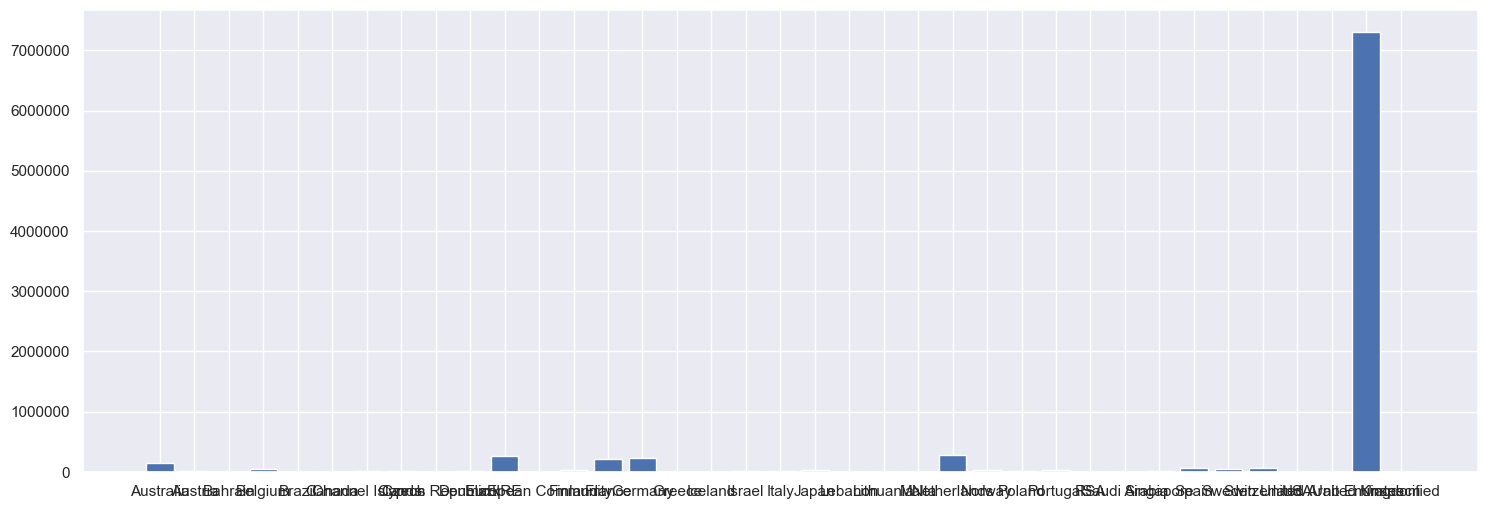

In [30]:
# chart 3: Sales Value By Country
fig, ax = plt.subplots(figsize=(18,6))
# display the plain values in the Y-axis
ax.ticklabel_format(axis='y', style='plain')
ax.bar(grouped_country_df.Country, grouped_country_df.TotalAmount)

### Custmizing the Bars

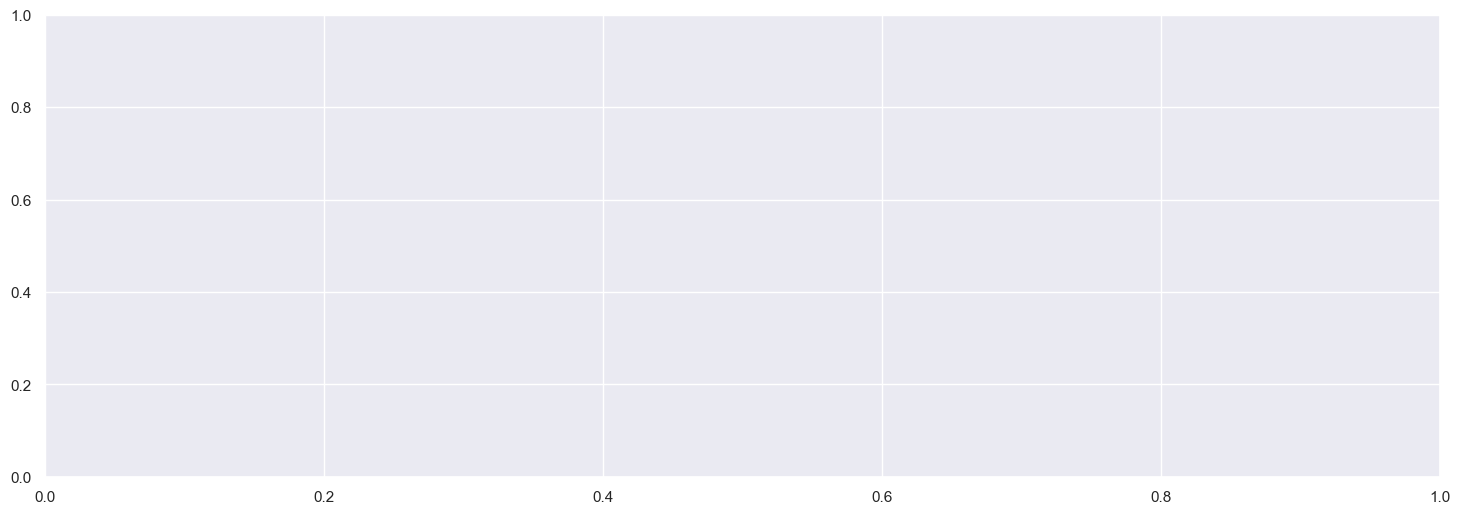

In [21]:
# --setup the figure with the axes
fig, ax = plt.subplots(figsize=(18,6))

#### Bar Plots using Seaborn

Text(0.5, 1.0, 'Total Sales Value By Country')

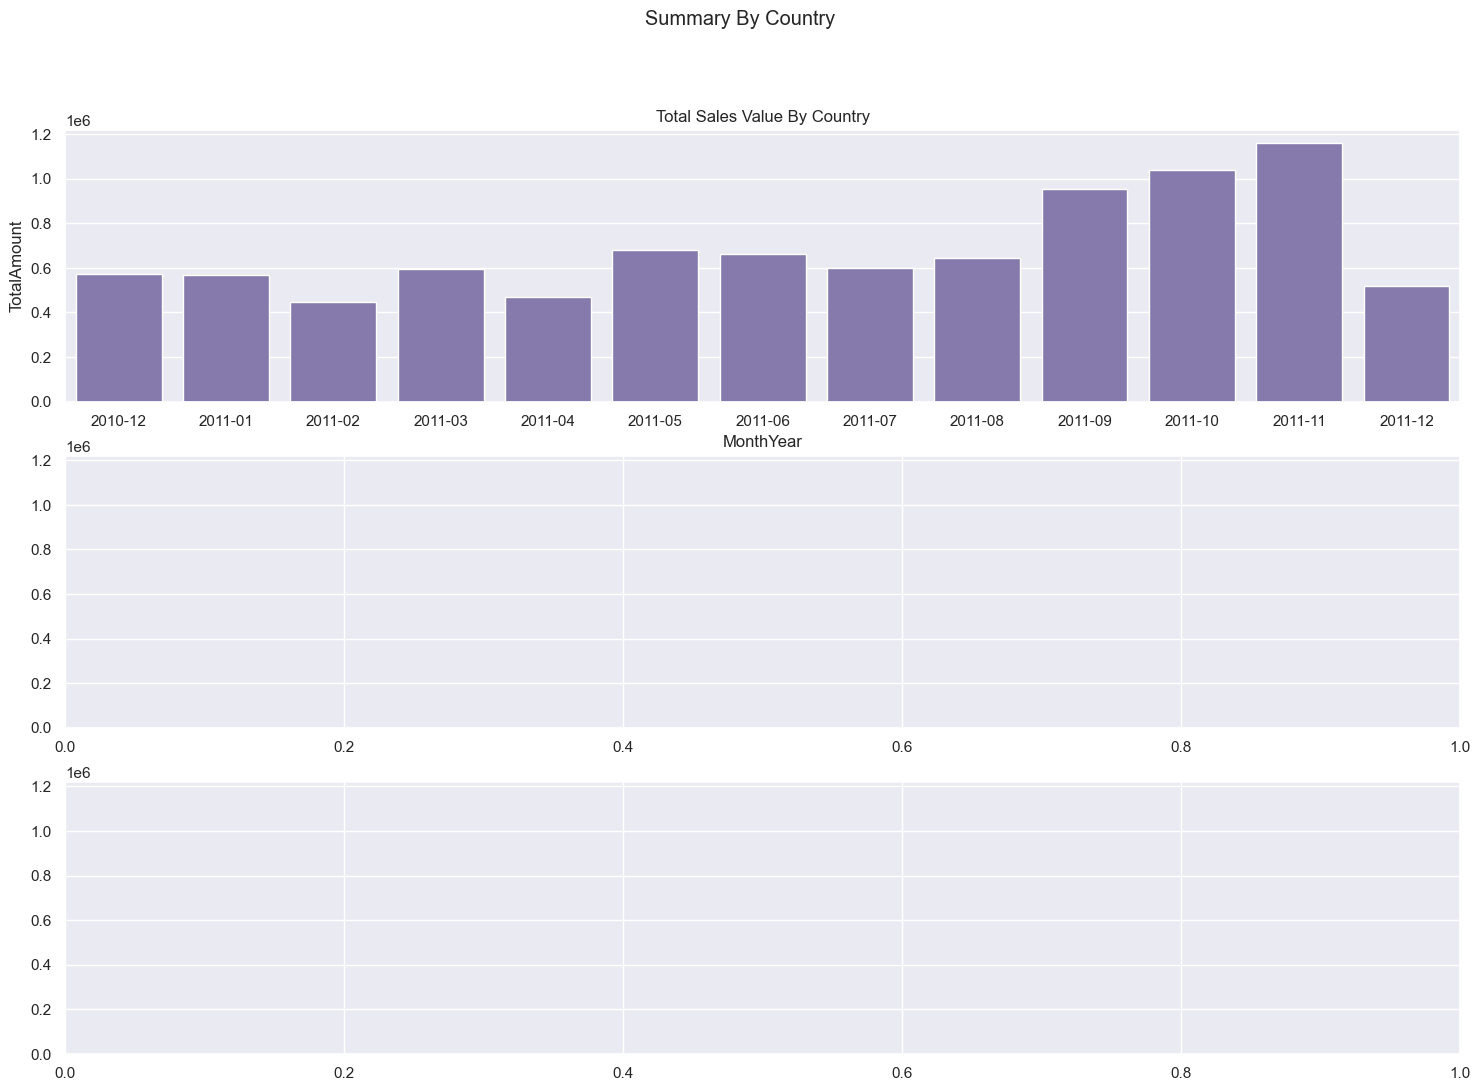

In [ ]:
fig, axes = plt.subplots(3,1, figsize=(18,12), sharey=True)
fig.suptitle('Summary By Country')

sns.barplot(ax=axes[0], x=monthly_agg_df.MonthYear, y=monthly_agg_df.TotalAmount, color='m')
axes[0].set_title("Total Sales Value By Country")